In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
path= 'C:/Users/USER/Desktop/dataset/deepL/open_data/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test_x.csv')

In [29]:
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True) # train에서 voted 제외하고

In [30]:
data

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,1,1,0,1,1,0,1,0,1,1
56911,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,1,1,1,1,1,1,1,1,1,1
56912,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,1,1,0,1,1,0,1,0,1,1
56913,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,1,0,0,1,1,0,1,1,1,0


In [31]:
# 개인 정보 columns data
personal_cols =['age_group','education','engnat','familysize','gender','hand','married','race','religion','urban']
Personal_info = data[personal_cols].copy()

In [32]:
Personal_info.hand.unique() #1,2,3,0

array([1, 2, 3, 0], dtype=int64)

In [33]:
# 1 : R / 2: L / 3: B
Personal_info.hand.value_counts() # 결측치 0 >> 201개

1    48876
2     5847
3     1991
0      201
Name: hand, dtype: int64

[Text(0, 0, 'Right'),
 Text(0, 0, 'Left'),
 Text(0, 0, 'Both'),
 Text(0, 0, 'None')]

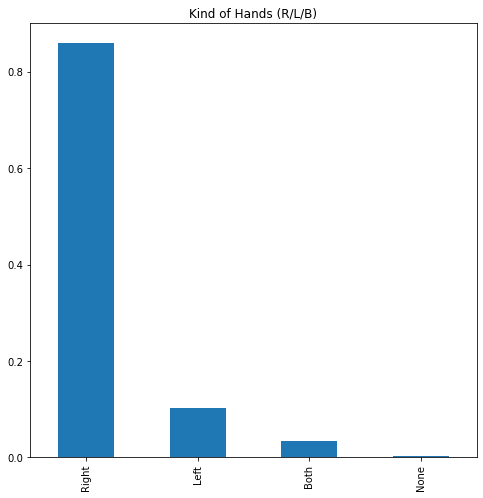

In [41]:
ax2 = Personal_info.hand.value_counts(normalize=True).plot(kind='bar',
                                                         figsize=(8,8),
                                                         title='Kind of Hands (R/L/B)')
ax2.set_xticklabels(['Right','Left','Both','None'])

In [59]:
no_hand=Personal_info[Personal_info['hand']==0]
no_hand=pd.DataFrame(no_hand)
no_hand=no_hand.drop("hand", axis=1)
no_hand

,age_group,education,engnat,familysize,gender,married,race,religion,urban
98,30s,4,1,2,Female,2,White,Other,3
195,40s,2,2,5,Male,1,Asian,Atheist,2
201,20s,2,1,3,Male,1,White,Atheist,2
746,10s,1,1,4,Female,0,Black,Christian_Other,3
1162,10s,2,1,2,Male,1,White,Atheist,3
...,...,...,...,...,...,...,...,...,...
55727,10s,1,1,3,Male,1,White,Christian_Protestant,2
55923,10s,2,2,2,Male,1,Black,Agnostic,3
55994,20s,4,1,2,Male,1,Black,Christian_Protestant,2
56287,20s,3,1,3,Male,1,White,Christian_Other,3


In [60]:
hand=Personal_info[Personal_info['hand']!=0]
hand=pd.DataFrame(hand)

In [61]:
hand

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban
0,30s,2,1,4,Female,1,3,White,Other,1
1,20s,4,2,3,Female,1,1,Asian,Hindu,3
2,30s,3,1,3,Male,1,2,White,Other,2
3,20s,4,2,0,Female,1,1,Asian,Hindu,3
4,20s,3,1,2,Male,1,2,White,Agnostic,1
...,...,...,...,...,...,...,...,...,...,...
56910,20s,3,2,3,Female,1,1,Other,Christian_Catholic,0
56911,10s,2,2,1,Female,1,1,Asian,Agnostic,2
56912,30s,4,1,4,Male,1,2,White,Atheist,1
56913,40s,2,1,3,Female,1,2,White,Atheist,2


In [62]:
no_hand

,age_group,education,engnat,familysize,gender,married,race,religion,urban
98,30s,4,1,2,Female,2,White,Other,3
195,40s,2,2,5,Male,1,Asian,Atheist,2
201,20s,2,1,3,Male,1,White,Atheist,2
746,10s,1,1,4,Female,0,Black,Christian_Other,3
1162,10s,2,1,2,Male,1,White,Atheist,3
...,...,...,...,...,...,...,...,...,...
55727,10s,1,1,3,Male,1,White,Christian_Protestant,2
55923,10s,2,2,2,Male,1,Black,Agnostic,3
55994,20s,4,1,2,Male,1,Black,Christian_Protestant,2
56287,20s,3,1,3,Male,1,White,Christian_Other,3


In [109]:
# hand 복사 (1,2,3만 있는 / 0제외한(no_hand))
hand_train = hand.copy()
hand_train.shape

(56714, 10)

In [104]:
hand_train.gender.unique()

array(['Female', 'Male'], dtype=object)

In [110]:
# <gender> 남자는 1 여자는 0
hand_train['gender'] = hand_train['gender'].map({'Male':1,'Female':0})
hand_train.gender

0        0
1        0
2        1
3        0
4        1
        ..
56910    0
56911    0
56912    1
56913    0
56914    0
Name: gender, Length: 56714, dtype: int64

In [114]:
# <age_group> 
hand_train['age_group'].unique()
hand_train['age_group'] = hand_train['age_group'].map({'10s':1,'20s':2,'30s':3,'40s':4,'50s':5,'60s':6,'+70s':7})

In [118]:
# <urban>
hand_train['race'].unique()
hand_train['race'] = hand_train['race'].map({'White':0, 'Asian':1, 'Other':2, 'Black':3, 'Native American':4, 'Arab':5,
       'Indigenous Australian':6})

In [119]:
# <religion>
hand_train['religion'].unique()
hand_train['religion'] = hand_train['religion'].map({'Other':0, 'Hindu':1, 'Agnostic':2, 'Atheist':3, 'Christian_Other':4,
       'Christian_Catholic':5, 'Muslim':6, 'Buddhist':7, 'Christian_Protestant':8,
       'Jewish':9, 'Christian_Mormon':10, 'Sikh':11})

In [120]:
hand_train

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban
0,3,2,1,4,0,1,3,0,0,1
1,2,4,2,3,0,1,1,1,1,3
2,3,3,1,3,1,1,2,0,0,2
3,2,4,2,0,0,1,1,1,1,3
4,2,3,1,2,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
56910,2,3,2,3,0,1,1,2,5,0
56911,1,2,2,1,0,1,1,1,2,2
56912,3,4,1,4,1,1,2,0,3,1
56913,4,2,1,3,0,1,2,0,3,2


In [122]:
features = hand_train[['age_group', 'education', 'engnat', 'familysize','gender','married','race','religion','urban']]
yhat = hand_train['hand']

In [142]:
# train set & test set
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, yhat)

In [124]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [143]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
print(model.score(train_features, train_labels)) # 예측력 약 86%

0.862066533443047


In [145]:
print(model.score(test_features, test_labels))

0.8608505536356583


In [163]:
no_hand_t = no_hand.copy()
no_hand_t

,age_group,education,engnat,familysize,gender,married,race,religion,urban
98,30s,4,1,2,Female,2,White,Other,3
195,40s,2,2,5,Male,1,Asian,Atheist,2
201,20s,2,1,3,Male,1,White,Atheist,2
746,10s,1,1,4,Female,0,Black,Christian_Other,3
1162,10s,2,1,2,Male,1,White,Atheist,3
...,...,...,...,...,...,...,...,...,...
55727,10s,1,1,3,Male,1,White,Christian_Protestant,2
55923,10s,2,2,2,Male,1,Black,Agnostic,3
55994,20s,4,1,2,Male,1,Black,Christian_Protestant,2
56287,20s,3,1,3,Male,1,White,Christian_Other,3


In [164]:
no_hand_t['gender'] = no_hand_t['gender'].map({'Male':1,'Female':0})
no_hand_t['age_group'] = no_hand_t['age_group'].map({'10s':1,'20s':2,'30s':3,'40s':4,'50s':5,'60s':6,'+70s':7})
no_hand_t['race'] = no_hand_t['race'].map({'White':0, 'Asian':1, 'Other':2, 'Black':3, 'Native American':4, 'Arab':5,
       'Indigenous Australian':6})
no_hand_t['religion'] = no_hand_t['religion'].map({'Other':0, 'Hindu':1, 'Agnostic':2, 'Atheist':3, 'Christian_Other':4,
       'Christian_Catholic':5, 'Muslim':6, 'Buddhist':7, 'Christian_Protestant':8,
       'Jewish':9, 'Christian_Mormon':10, 'Sikh':11})

In [165]:
np.array(no_hand_t)

array([[3, 4, 1, ..., 0, 0, 3],
       [4, 2, 2, ..., 1, 3, 2],
       [2, 2, 1, ..., 0, 3, 2],
       ...,
       [2, 4, 1, ..., 3, 8, 2],
       [2, 3, 1, ..., 0, 4, 3],
       [2, 2, 2, ..., 1, 2, 1]], dtype=int64)

In [166]:
model.predict(np.array(no_hand_t)) # 전부 오른손(1)으로 예측됨 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [179]:
Personal_info.hand[Personal_info.hand==0] == 1 # 위 예측값을 바탕으로 전부 1로 채움 

Series([], Name: hand, dtype: bool)

In [180]:
Personal_info.hand.value_counts()

1    49077
2     5847
3     1991
Name: hand, dtype: int64